Alice wants to send a bitcoin to Bob

She does this by sending him her private key or a singed transaction
either on the mainchain or the lightning network

Assume she wants to send the key below

E9873D79C6D87DC0FB6A5778633389F4453213303DA61F20BD67FC233AA33262 to Bob with a Quantum One Time Pad,

here is what she will do.

She will send each letter from the above string of letters through the quantum channel.

Let's send the very first letter only for today. Thus, letter E

In [11]:
m1 = 'E9873D79C6D87DC0FB6A5778633389F4453213303DA61F20BD67FC233AA33262'

In [12]:
m2 = m1[0]

In [13]:
m3 = ord(m2)

In [14]:
m4 = bin(m3)[2:]

In [15]:
message = list(m4)

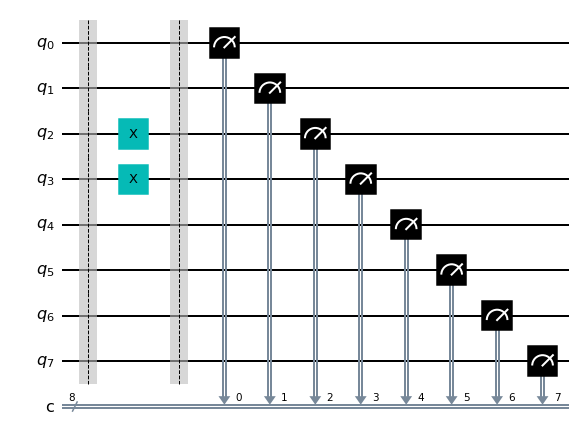

In [16]:
# Encryption

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

qregA = QuantumRegister(8, 'q') # quantum register with 8 qubits
cregA = ClassicalRegister(8, 'c') # classical register with 8 bits
mycircuitA = QuantumCircuit(qregA,cregA) # quantum circuit with quantum and classical registers

for m in range(len(message)):
    if message[m]==1:
        mycircuitA.x(qregA[m])

mycircuitA.barrier()

# create random key and apply x gates and encrypt message
key=[] 
for i in range(8):
    a=randrange(2)
    key.append(a)
    if a==1:
        mycircuitA.x(qregA[i])
        
mycircuitA.barrier()
mycircuitA.measure(qregA,cregA)
mycircuitA.draw(output='mpl')

In [17]:
# execute the circuit
job = execute(mycircuitA,Aer.get_backend('qasm_simulator'))
encryption = job.result().get_counts(mycircuitA)

# display the measurement results with total count
print("Encryption", encryption)
# this converts the measurement result string into a list
encrypted_message=list(map(int,[*list(encryption.keys())[0]]))

# we reverse the list since the Qiskit considers our MSB as LSB
encrypted_message.reverse()
print()
print("Message:", message)
print("Key:", key)
print()
print("Encrypted Message:", encrypted_message)

Encryption {'00001100': 1024}

Message: ['1', '0', '0', '0', '1', '0', '1']
Key: [0, 0, 1, 1, 0, 0, 0, 0]

Encrypted Message: [0, 0, 1, 1, 0, 0, 0, 0]


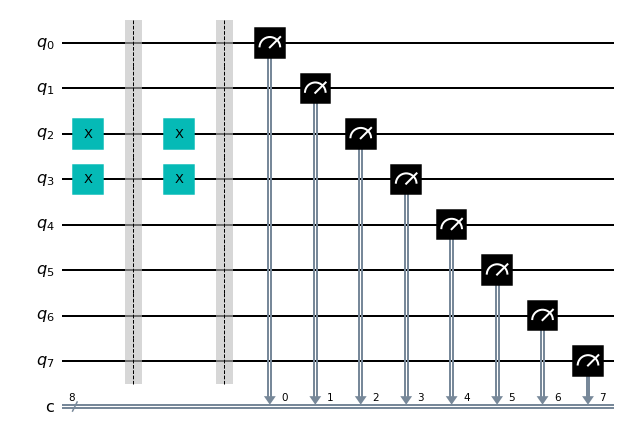

In [18]:
# Decryption

qregB = QuantumRegister(8, 'q') # quantum register with 8 qubits
cregB = ClassicalRegister(8, 'c') # classical register with 8 bits
mycircuitB = QuantumCircuit(qregB,cregB) # quantum circuit with quantum and classical registers

# apply x-gate to change initial states from 0 to 1, preparing the state with encrypted message
for m in range(len(encrypted_message)):
    if encrypted_message[m]==1:
        mycircuitB.x(qregB[m])

mycircuitB.barrier()

# use the same random key and apply x gates to decrypt message.
# Hence random key should have been shared between Alice and Bob classically with RSA or via 
# a quantum network using BB84

for n in range(len(key)):
    if key[n]==1:
        mycircuitB.x(qregB[n])        
    
mycircuitB.barrier()

mycircuitB.measure(qregB,cregB)

mycircuitB.draw(output='mpl')

In [19]:
# execute the circuit
job = execute(mycircuitB,Aer.get_backend('qasm_simulator'))
decryption = job.result().get_counts(mycircuitB)

# display the measurement results with total count
print("Decryption", decryption)
# this converts the measurement result string into a list
decrypted_message=list(map(int,[*list(decryption.keys())[0]]))

# we reverse the list since Qiskit considers our MSB as LSB
decrypted_message.reverse()
print()
print("Message:", message)
print("Decrypted Message:", decrypted_message)
print()  
  
if message == decrypted_message:  
    print("Protocol is correct!")  
else:  
    print("Protocol is incorrect!")

Decryption {'00000000': 1024}

Message: ['1', '0', '0', '0', '1', '0', '1']
Decrypted Message: [0, 0, 0, 0, 0, 0, 0, 0]

Protocol is incorrect!
